Q1. Problem Statement: K Nearest Neighbor (KNN) Algorithm

You  are  given  a  dataset –“diabetes.csv.” Load  the  dataset  into  a DataFrame. Now,  Considering  the “Outcome”column  as  the  target variable, perform the  following tasks:

1.Declare feature vectors and the target variable

2.Split the data into test and train fragments using train_test_split()function in 80:20 ratio (80% train, 20% test)

3.Generate a line plot to show accuracies for different numbers of neighbors

4.Identify the maximum accuracy from the plot and Calculate model accuracy with the nearest neighbors, which could fetch maximum accuracy

5.For  the  neighbors  which  show  maximum  accuracy,  plot  a  ROC(Reciever Operating Characteristic) curveDataset:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



1.Declare feature vectors and the target variable

In [ ]:

x=df.drop(['Outcome'],axis=1).values
y=df['Outcome'].values

In [ ]:
display(x)


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
print('feature vectors are:')
display(y)

feature vectors are:


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

2.Split the data into test and train fragments using train_test_split()function in 80:20 ratio (80% train, 20% test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)


In [ ]:
df['Outcome'].value_counts(normalize=bool)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
pd.Series(y_train).value_counts(normalize=bool)

0    0.651466
1    0.348534
dtype: float64

In [ ]:
pd.Series(y_test).value_counts(normalize=bool)

0    0.649351
1    0.350649
dtype: float64

In [ ]:
print("After splitting data-")
print("size of input train data:",sys.getsizeof(x_train))
print("size of input test data:",sys.getsizeof(x_test))
print("size of output train data:",sys.getsizeof(y_train))
print("size of output test data:",sys.getsizeof(y_test))


After splitting data-
size of input train data: 39424
size of input test data: 9984
size of output train data: 5024
size of output test data: 1344


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


.Generate a line plot to show accuracies for different numbers of neighbors

In [ ]:
from sklearn import neighbors

In [ ]:
neighbors=np.arange(1,9)

In [ ]:
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:

for i,k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(x_train, y_train)
    y_train_pred=knn.predict(x_train)
    y_test_pred=knn.predict(x_test)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)

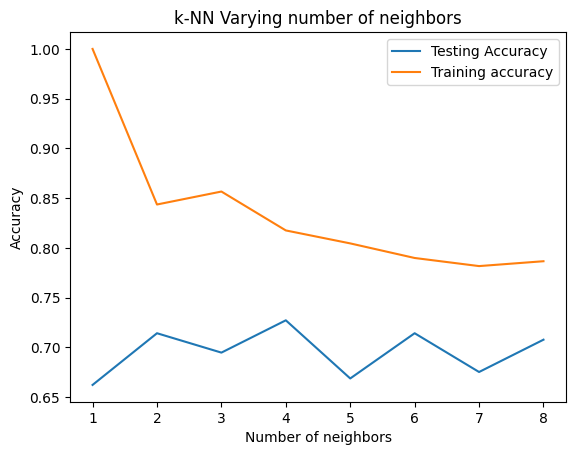

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

4.Identify the maximum accuracy from the plot and Calculate model accuracy with the nearest neighbors, which could fetch maximum accuracy

In [ ]:
test_accuracy[i] = knn.score(x_test, y_test)
test_accuracy[i]

0.7077922077922078

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=2)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train,y_train)
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
pred2=knn2.predict(x_test)
acc_gnb=accuracy_score(y_test,pred2)
print("Accuracy score for 2 neighbours-")
print('Accuracy Score: ',acc_gnb)

Accuracy score for 2 neighbours-
Accuracy Score:  0.7142857142857143


In [ ]:

pred3=knn3.predict(x_test)
acc_gnb=accuracy_score(y_test,pred3)
print("Accuracy score for 3 neighbours-")
print('Accuracy Score: ',acc_gnb)

Accuracy score for 3 neighbours-
Accuracy Score:  0.6948051948051948


5.For the neighbors which show maximum accuracy, plot a ROC(Reciever Operating Characteristic) curveDataset:

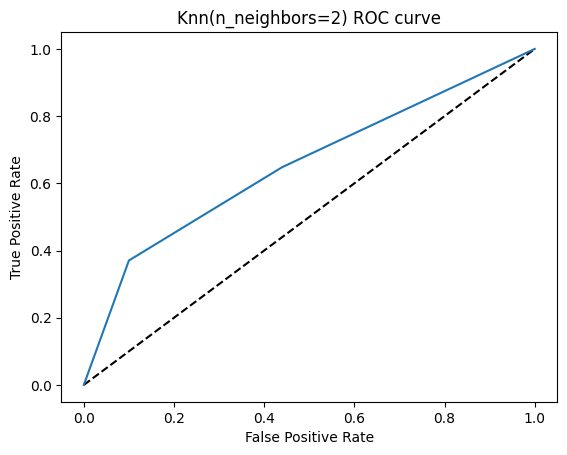

In [ ]:
y_pred_proba = knn2.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

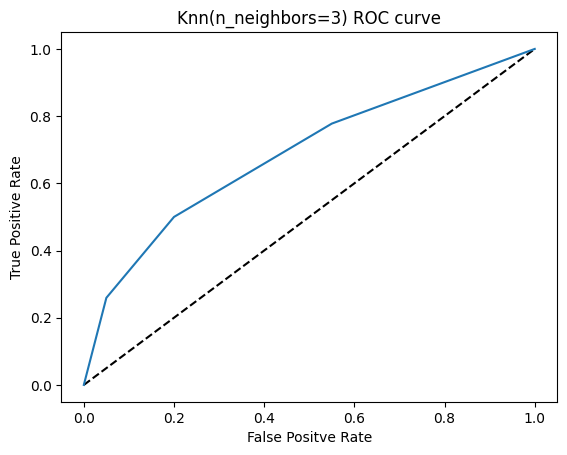

In [ ]:
y_pred_proba = knn3.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()